This notebook requires:
- jaxlib (`pip install jaxlib`)
- jax
- sympy
- scipy
- sympy2jax (`pip install sympy2jax`) -- but sympy's built-in lambdify should be sufficient for our uses

Not needed but in case we want to parse LaTeX:

- antlr4 python runtime (`conda install -c conda-forge antlr-python-runtime`) — for sympy's LaTeX parsing

In [1]:
import jax
import jax.numpy as jnp
import sympy
# from sympy.parsing.latex import parse_latex
# from sympy2jax import sympy2jax
import matplotlib.pyplot as plt
import scipy
import scipy.constants as const

In [2]:
%matplotlib notebook

---

### jax testing

In [3]:
def func(x):
    return jnp.sin(x) ** 2
def pot(x):
    return x ** 2

In [4]:
func_grad = jax.grad(func)

<IPython.core.display.Javascript object>


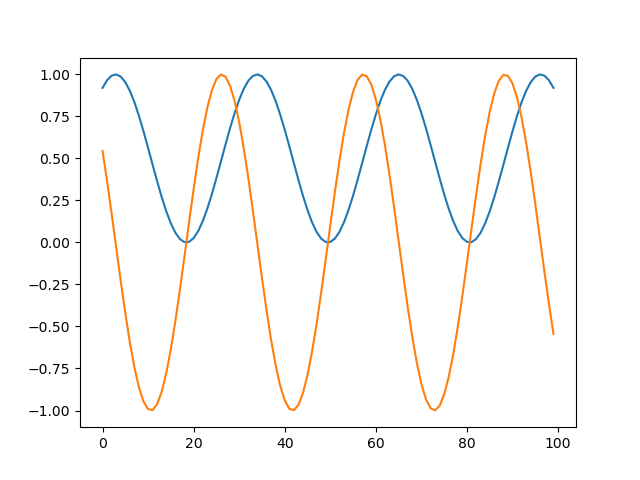

In [5]:
plt.figure()
plt.plot(func(jnp.linspace(-5, 5, 100)))
# Need jax.vmap to vectorize the function
plt.plot(jax.vmap(func_grad)(jnp.linspace(-5, 5, 100)))

---

### sympy testing

In [6]:
E_b, R_p, beta = sympy.symbols('E_{b} R_{p} beta')

In [7]:
equation = parse_latex(r"0.089 E_b \log \left(\frac{R_p}{1-\beta} \right)^{0.4}")

NameError: name 'parse_latex' is not defined

In [8]:
equation.as_terms()

NameError: name 'equation' is not defined

In [ ]:
equation.free_symbols

In [ ]:
equation.subs({'E_{b}': 1.0,
               'R_{p}': 1.0,
               'beta': 0.5})

In [ ]:
from sympy.abc import x
from sympy import log

In [ ]:
# x = sympy.symbols('x')
f = sympy.lambdify(x, log(x))

In [ ]:
expr = parse_latex(r"\log(x)")

In [ ]:
expr.as_terms()

In [ ]:
f = sympy.lambdify(x, expr)

In [ ]:
import math

In [ ]:
f = sympy.lambdify((E_b, R_p, beta), equation, modules=[{'log': math.log}, jnp])

In [ ]:
f(jnp.ones(1), jnp.ones(1), jnp.zeros(1))

In [ ]:
p1, p2 = sympy.symbols("m p")
eq = parse_latex(r"\frac{m}{p}")

In [ ]:
mod = sympy2jax.SymbolicModule(eq)

In [ ]:
mod(p1=1.0, p2=0.5)

In [ ]:
[a, b] = sympy.symbols('a_d b_d')

In [ ]:
asdf = a/b